In [1]:
import numpy as np
import OQtrl as oqt
import ADwin as ad
import inspect

In [2]:
# 1. Create a manager object
experiment_manager = oqt.manager(boot=False)  # boot=False to prevent ADwin booting

Adwin not booted, please boot manually


In [3]:
# 2. Create new project
experiment_manager.create_project(name="Digital Output Examples")

In [4]:
experiment_manager["Digital Output Examples"]

Project | Name: Digital Output Examples, Number of Master Sequences: 0

In [8]:
# 3. Create a new master sequence
MOT_master = oqt.sequence.masterSequence(name="MOT", duration=100e-3)

In [9]:
MOT_master

 Master Sequence | Name: MOT, Duration: 0.1 
 slaves: []

In [10]:
# 4. Setting up the master sequence
# 4.1. Set digital output update period
MOT_master.settings.set_update_period(DO=1e-3)
# 4.2 Check the settings
MOT_master.settings.DO

masterSequenceSetting.DigOut(DO_FIFO_UPDATE_PERIOD=0.001, DO_FIFO_CH_PATTERN=None, DO_FIFO_WRITE_COUNT=None)

In [11]:
# 5. Create a new slave sequence for the master sequence
MOT_master.create_slave(types="DO", name="MOT_AOM_Driver", ch=0)
# Check total length of the slave sequence
MOT_master

 Master Sequence | Name: MOT, Duration: 0.1 
 slaves: ['MOT_AOM_Driver']

In [12]:
# 6. Pattern modifying
MOT_master["MOT_AOM_Driver"].pattern.update("1" * 50 + "0" * 50)

In [13]:
# 6.1 Verifying the pattern
MOT_master["MOT_AOM_Driver"].pattern

Pattern | Type: DO, Data: 1111111111111111111111111111111111111111111111111100000000000000000000000000000000000000000000000000

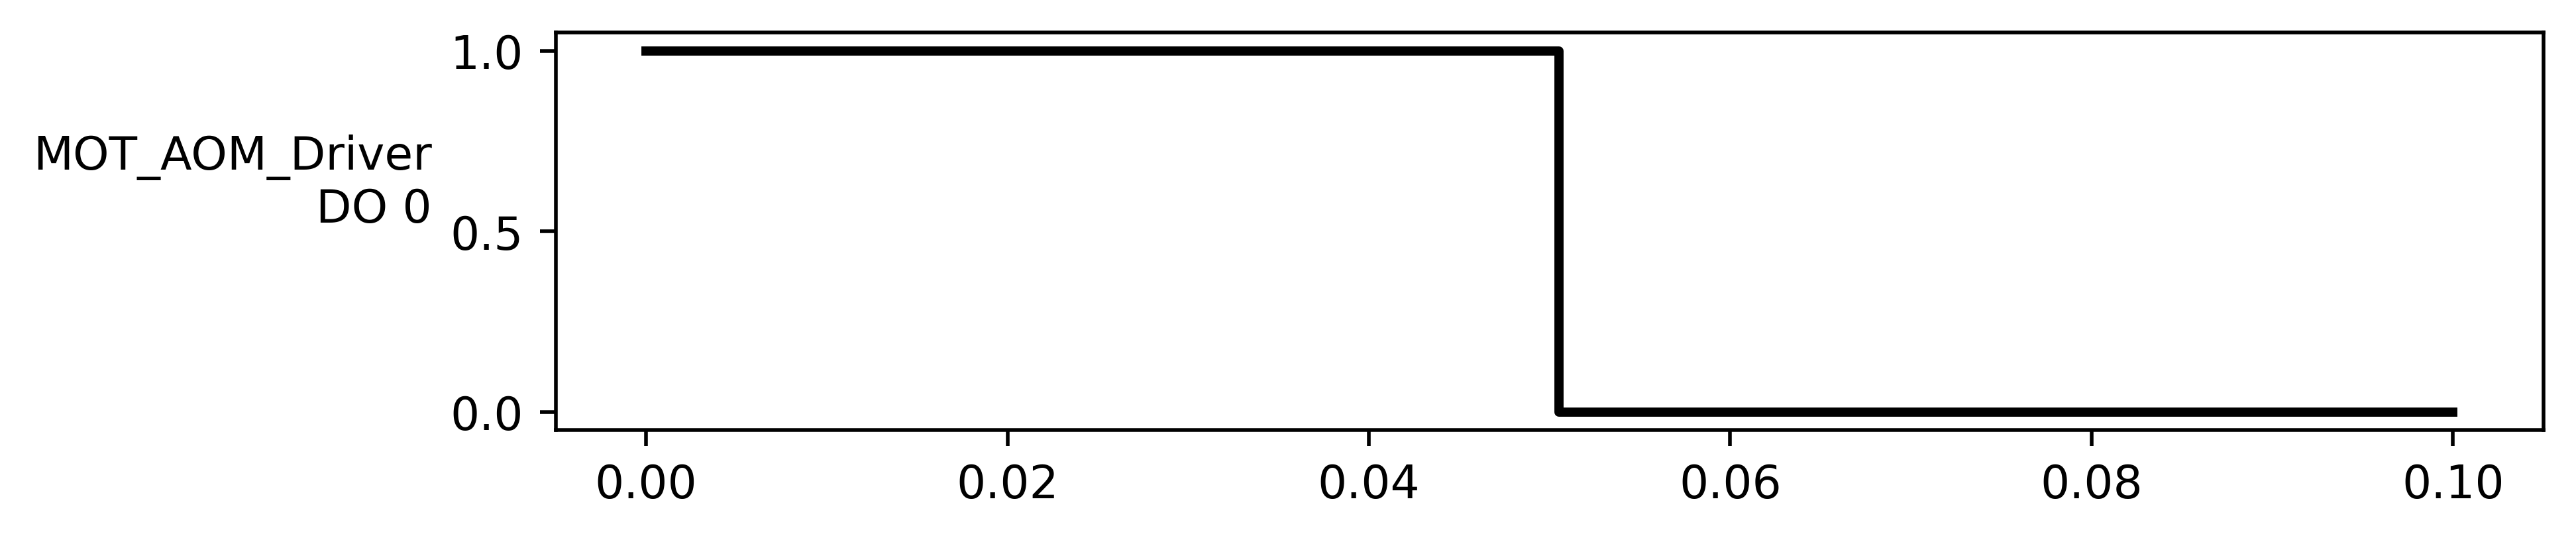

In [14]:
MOT_master.plot()

In [15]:
# 6.2 Let's make other sequences
MOT_master.create_slave(types="DO", name="MOT_MEMS_Switch", ch=1)
MOT_master["MOT_MEMS_Switch"].pattern.update("1" * 50 + "0" * 50)

MOT_master.create_slave(types="DO", name="AH_Coil_Driver", ch=2)
MOT_master["AH_Coil_Driver"].pattern.update("1" * 50 + "0" * 50)

MOT_master.create_slave(types="DO", name="Camera_trigger", ch=3)
MOT_master["Camera_trigger"].pattern.update("0" * 50 + "1" * 20 + "0" * 30)

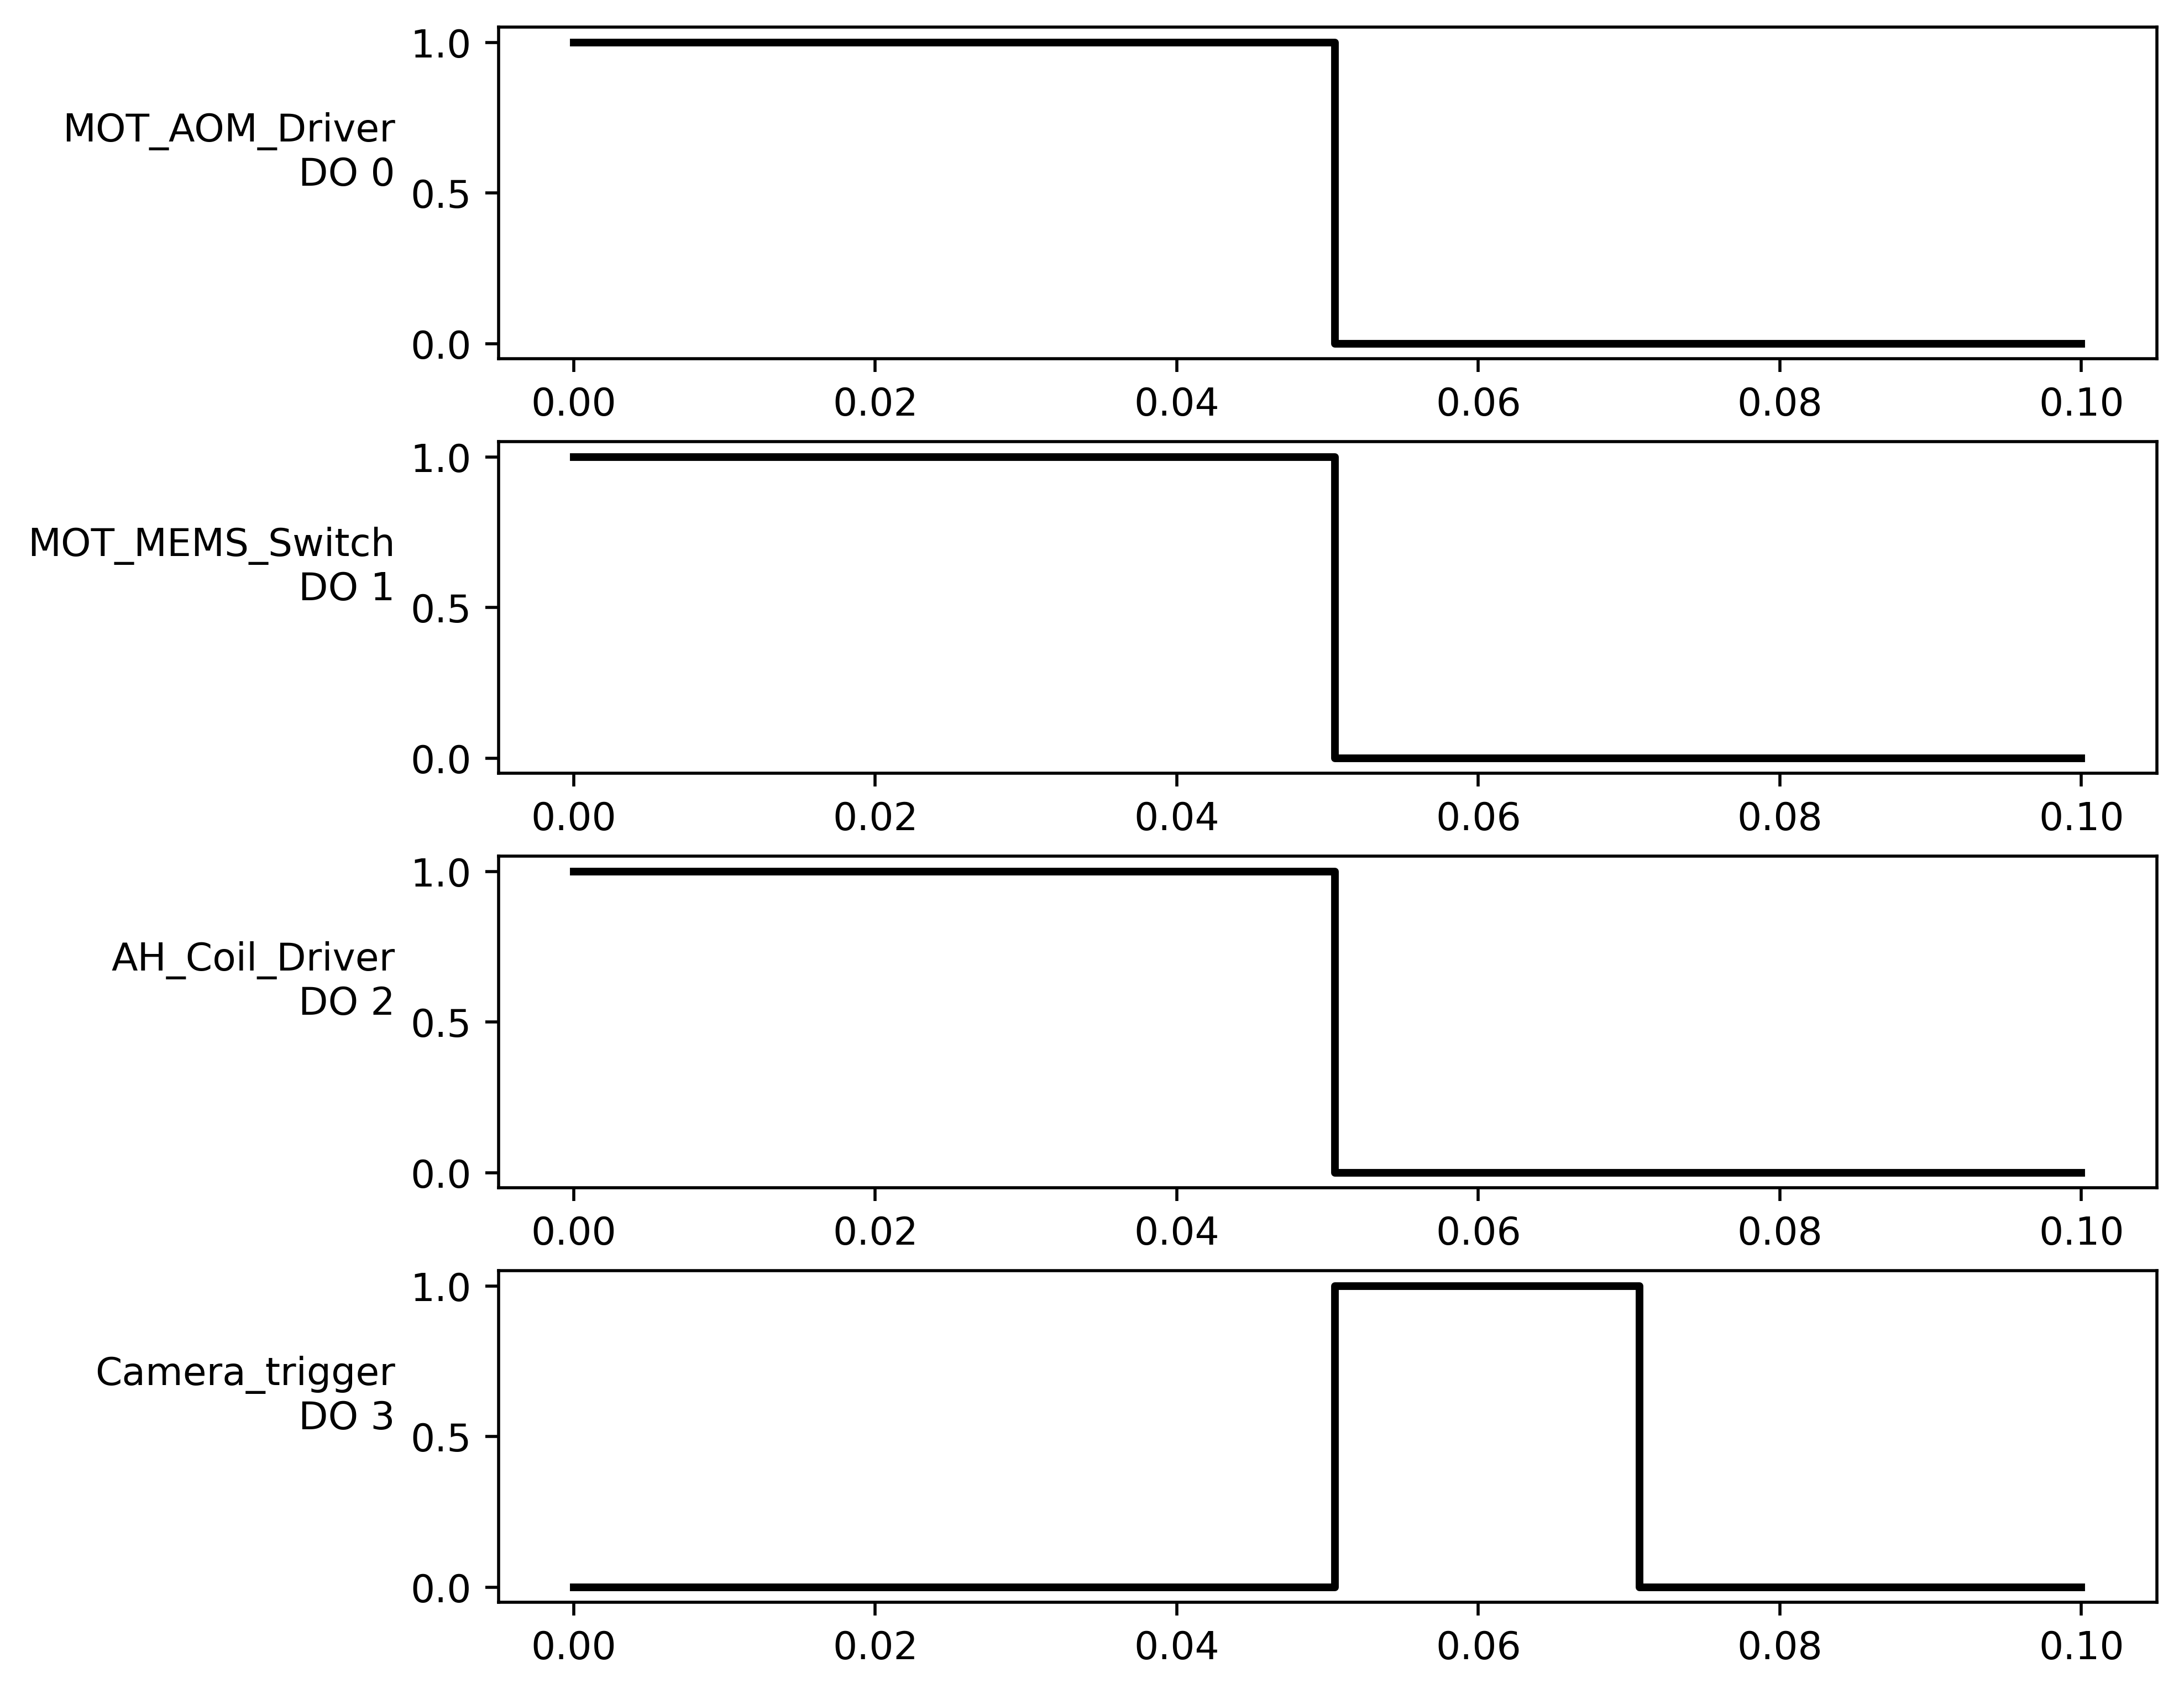

In [16]:
# 6.3 Let's Plot our Master sequence to see what we have done
MOT_master.plot()

In [17]:
experiment_manager["Digital Output Examples"].append(MOT_master)

In [18]:
experiment_manager.start("Digital Output Examples")

1 11
31 00000000000000000000000000001111
32 100
33 1
50 3000
40 0
41 255
42 20000
43 25
44 010
30 <OQtrl.c_long_Array_200 object at 0x0000012B2B15AB50>
